# **Feature Extraction (TF-IDF) – Text analysis**

Saving tfidf_data.csv to tfidf_data.csv
Dataset Preview:
   id                                      text
0   1               I am studying data science.
1   2                        Text mining is fun
2   3                        ML is subset of AI
3   4  Machine learning is part of data science
4   5     TF-IDF gives importance to rare words

TF-IDF Feature Matrix:
         ai      data  data science       fun     gives  gives importance  \
0  0.000000  0.405801      0.405801  0.000000  0.000000          0.000000   
1  0.000000  0.000000      0.000000  0.447214  0.000000          0.000000   
2  0.447214  0.000000      0.000000  0.000000  0.000000          0.000000   
3  0.000000  0.330677      0.330677  0.000000  0.000000          0.000000   
4  0.000000  0.000000      0.000000  0.000000  0.301511          0.301511   

        idf  idf gives  importance  importance rare  ...   science  studying  \
0  0.000000   0.000000    0.000000         0.000000  ...  0.405801   0.50298   
1  0.000

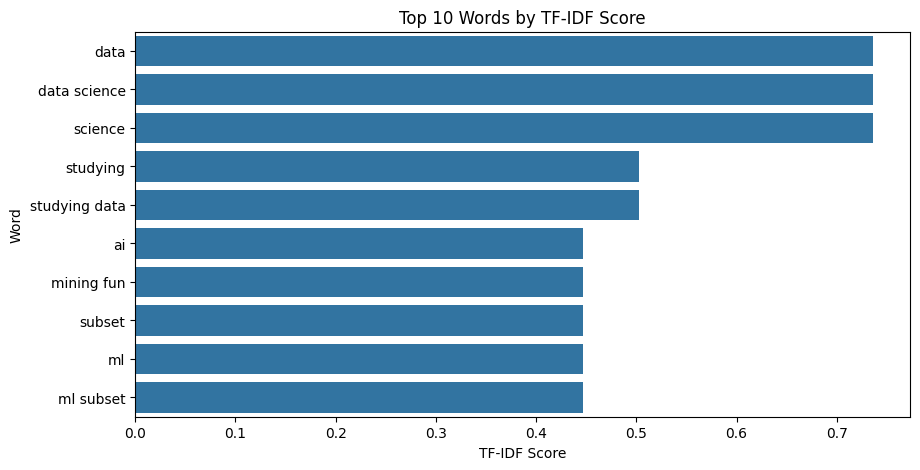

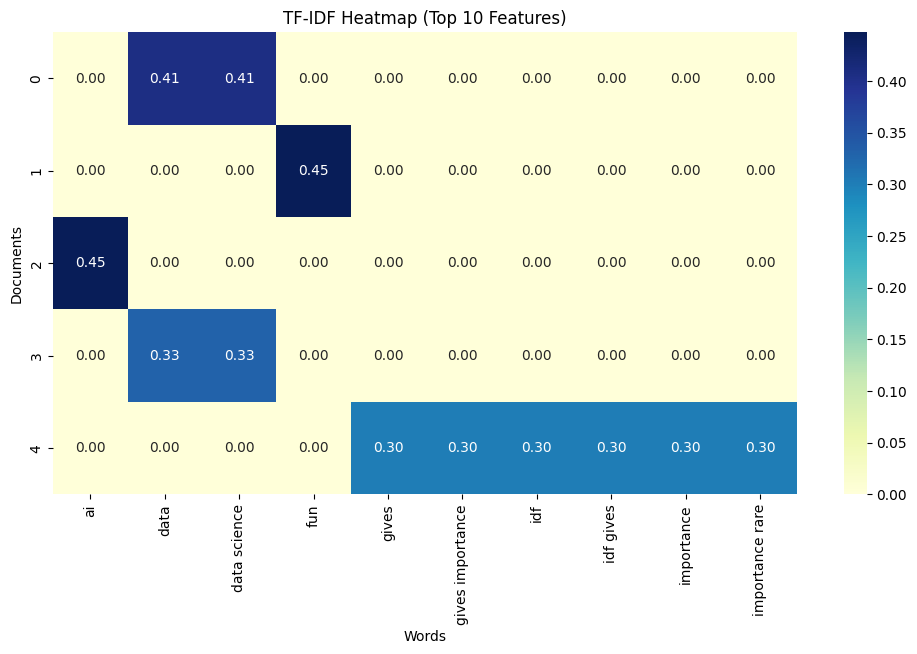

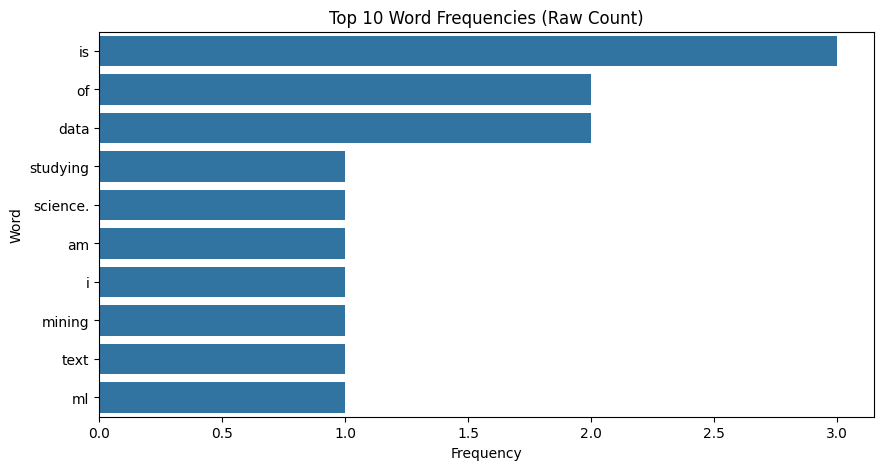

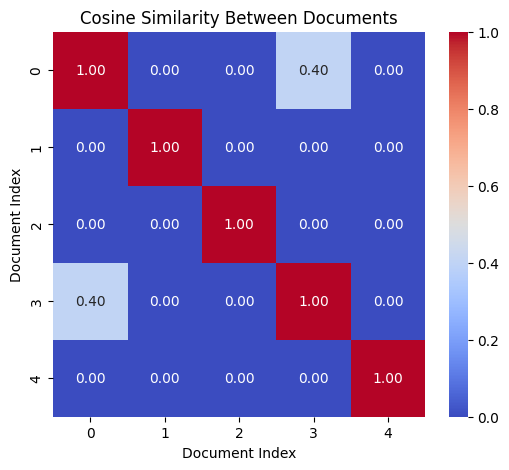


✔️ Saved Files:
1. tfidf_features_output.csv
2. document_similarity.csv


In [2]:
# TF-IDF TEXT FEATURE EXTRACTION (ADVANCED)
# 📌 Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 📥 Load Data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
print("Dataset Preview:")
print(df.head())

# 🔹 TF-IDF with Additional Features
tfidf = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 2),     # Unigram + Bigram
    max_features=30        # Limit features for clarity
)

tfidf_matrix = tfidf.fit_transform(df['text'])

# Feature names
features = tfidf.get_feature_names_out()

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=features)
print("\nTF-IDF Feature Matrix:")
print(tfidf_df)

# 📊 GRAPH 1: TOP TF-IDF WORDS (BAR CHART)
word_scores = tfidf_df.sum(axis=0).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(
    x=word_scores.values[:10],
    y=word_scores.index[:10]
)
plt.title("Top 10 Words by TF-IDF Score")
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")
plt.show()

# 📊 GRAPH 2: TF-IDF HEATMAP (DOCUMENT vs WORD)
plt.figure(figsize=(12,6))
sns.heatmap(
    tfidf_df.iloc[:, :10],
    cmap="YlGnBu",
    annot=True,
    fmt=".2f"
)
plt.title("TF-IDF Heatmap (Top 10 Features)")
plt.xlabel("Words")
plt.ylabel("Documents")
plt.show()

# 📊 GRAPH 3: WORD FREQUENCY vs TF-IDF
# Word Frequency
word_freq = {}
for text in df['text']:
    for word in text.lower().split():
        word_freq[word] = word_freq.get(word, 0) + 1

freq_df = pd.DataFrame(
    word_freq.items(),
    columns=["Word", "Frequency"]
)

freq_df = freq_df.sort_values(by="Frequency", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x=freq_df["Frequency"],
    y=freq_df["Word"]
)
plt.title("Top 10 Word Frequencies (Raw Count)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

# 📊 GRAPH 4: COSINE SIMILARITY BETWEEN DOCUMENTS
cos_sim = cosine_similarity(tfidf_matrix)
cos_sim_df = pd.DataFrame(cos_sim)

plt.figure(figsize=(6,5))
sns.heatmap(
    cos_sim_df,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Cosine Similarity Between Documents")
plt.xlabel("Document Index")
plt.ylabel("Document Index")
plt.show()

# 🧾 SAVE OUTPUT FILES
tfidf_df.to_csv("tfidf_features_output.csv", index=False)
cos_sim_df.to_csv("document_similarity.csv", index=False)

print("\n✔️ Saved Files:")
print("1. tfidf_features_output.csv")
print("2. document_similarity.csv")
